In [3]:
# root to training data 
root = '/media/oskar/ESSD/deepSat/processed-data/TCI_256_split/Tidsperiod-1/train'


import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import torch.nn as nn


from dataset.datasets import sentinel
from model.models import UNET

from torchvision import transforms
from torch.utils.data import DataLoader





transform=transforms.Compose([transforms.ToTensor()])
dataset = sentinel(root_dir=root,img_transform=transform)
data_loader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)
unet = UNET()

# simple training loop
import torch.optim as optim

optimizer = optim.NAdam(unet.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss(ignore_index=0)


EPOCHS = 10
lossv = 1337

for epoch in tqdm(range(EPOCHS),desc='Epoch'):
    for data in tqdm(data_loader,desc='Batch (Loss: %5.2f)'%(lossv)):
        
        X,y = data
        optimizer.zero_grad()
        output = unet(X)
        loss = loss_func(output,y)
        loss.backward()
        optimizer.step()
    lossv = loss.item()  

   
    

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch (Loss: 9999.00):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  3.37):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  3.10):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  2.83):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  2.57):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  2.36):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  2.24):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  2.12):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  1.96):   0%|          | 0/1 [00:00<?, ?it/s]

Batch (Loss:  1.81):   0%|          | 0/1 [00:00<?, ?it/s]

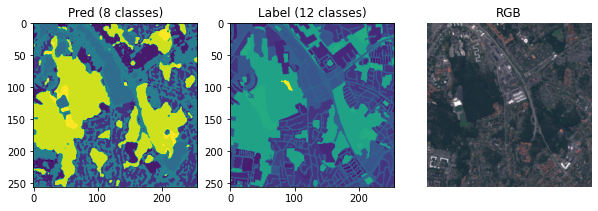

In [7]:
### see prediction vs label (should load unseen data before)
### help functions
import matplotlib.pyplot as plt
import torch 

def plot_pred_lbl_rgb(pred,labl,rgb):
    
    # def fig
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 3
    
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    plt.imshow(pred)
    
    plt.title("Pred (%d classes)"%(len(torch.unique(pred)))) 
    
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    plt.imshow(labl)          
    plt.title("Label (%d classes)"%(len(torch.unique(labl))))
    
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    plt.imshow(rgb.permute(1,2,0).numpy())
    plt.title("RGB")
    plt.axis('off')
    plt.show()
####################

with torch.no_grad():
    for batch in data_loader:
        X,y = batch
        preds = unet(X)
        preds = nn.functional.softmax(preds,dim=1)
        predlabls = torch.argmax(preds,dim=1)
        
        for idx, predlabl in enumerate(predlabls):
            plot_pred_lbl_rgb(predlabl,y[idx],X[idx])
            